# Getting Details of Subreddits

I will be investigating the details of subreddits provided by PushShift which is accessible here: https://files.pushshift.io/reddit/subreddits/

Table of contents:
1. [Reading Data and Imports](#sub1)
2. [Example Record](#sub2)
3. [Exploring Subreddits Features](#sub3)
4. [Reading in complete sets of graph subreddits](#sub4)
5. [Getting subreddits' descriptions and subscribers](#sub5) (skip because I have created these files now)

<a id="sub1"> </a>
## Reading Data and Imports

In [1]:
!pip install ijson

You should consider upgrading via the 'C:\Users\User200803\AppData\Local\Programs\Python\Python38\python.exe -m pip install --upgrade pip' command.


In [1]:
import json
import csv
import pandas as pd

import os

import zstandard as zstd
import io

from collections import Counter, defaultdict

import ijson # to stream large json files

import datetime

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dctx = zstd.ZstdDecompressor(max_window_size=2147483648)

In [3]:
dict_list = []

In [4]:
counter = 0
# with open("D://Wellesley/F21/thesis_zst_data/reddit_subreddits.ndjson.zst", 'rb') as ifh: #, open("stream_output.json", 'wb') as ofh:
with open("E://thesis_data//reddit_subreddits.ndjson.zst", 'rb') as ifh: #, open("stream_output.json", 'wb') as ofh:
    with dctx.stream_reader(ifh, read_size=2) as reader:
        text_stream = io.TextIOWrapper(reader, encoding='utf-8')
        for line in text_stream:
            if counter >= 1000:
                break
            d = json.loads(line)
            dict_list.append(d)
            counter += 1

In [5]:
ifh.close()

<a id="sub2"></a>
# Example Record

In [6]:
len(dict_list)

1000

In [7]:
print(len([dict_list[k]["active_user_count"] for k in range(len(dict_list)) if dict_list[k]["active_user_count"]])/len(dict_list))

0.0


In [8]:
print(json.dumps(dict_list[15], indent=4, sort_keys=True))

{
    "accounts_active": null,
    "accounts_active_is_fuzzed": false,
    "active_user_count": null,
    "advertiser_category": "",
    "all_original_content": false,
    "allow_discovery": true,
    "allow_galleries": true,
    "allow_images": true,
    "allow_polls": true,
    "allow_videogifs": true,
    "allow_videos": true,
    "banner_background_color": "",
    "banner_background_image": "",
    "banner_img": "",
    "banner_size": null,
    "can_assign_link_flair": false,
    "can_assign_user_flair": false,
    "collapse_deleted_comments": false,
    "comment_score_hide_mins": 0,
    "community_icon": "",
    "created_utc": 1143008966.0,
    "description": null,
    "description_html": null,
    "disable_contributor_requests": false,
    "display_name": "sv",
    "display_name_prefixed": "r/sv",
    "emojis_custom_size": null,
    "emojis_enabled": false,
    "free_form_reports": true,
    "has_menu_widget": false,
    "header_img": null,
    "header_size": null,
    "header_ti

In [9]:
dict_list[0].keys()

dict_keys(['accounts_active', 'accounts_active_is_fuzzed', 'active_user_count', 'advertiser_category', 'all_original_content', 'allow_discovery', 'allow_images', 'allow_polls', 'allow_videogifs', 'allow_videos', 'banner_background_color', 'banner_background_image', 'banner_img', 'banner_size', 'can_assign_link_flair', 'can_assign_user_flair', 'collapse_deleted_comments', 'comment_score_hide_mins', 'community_icon', 'created_utc', 'description', 'description_html', 'disable_contributor_requests', 'display_name', 'display_name_prefixed', 'emojis_custom_size', 'emojis_enabled', 'free_form_reports', 'has_menu_widget', 'header_img', 'header_size', 'header_title', 'hide_ads', 'icon_img', 'icon_size', 'id', 'is_crosspostable_subreddit', 'is_enrolled_in_new_modmail', 'key_color', 'lang', 'link_flair_enabled', 'link_flair_position', 'mobile_banner_image', 'name', 'notification_level', 'original_content_tag_enabled', 'over18', 'primary_color', 'public_description', 'public_description_html', 'pu

Keys for ranking:
1. `subscribers`

I was thinking of including `accounts_active` and `active_user_count` but both of these are always `null`, so I should rank based only on `subscribers`.

<a id="sub3"></a>
## Subreddits features explorations

In [10]:
import math

In [14]:
?sns.set

Text(0.5, 0, 'Number of subscribers')

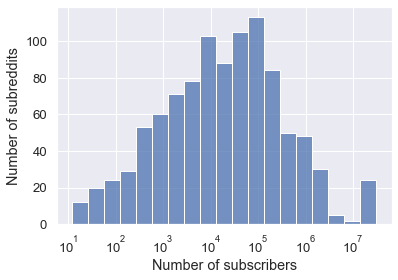

In [16]:
sns.set(font_scale = 1.2)
sns.histplot([dict_list[k]['subscribers']+1 for k in range(len(dict_list)) if dict_list[k]['subscribers']], log_scale=True)
plt.ylabel("Number of subreddits")
plt.xlabel("Number of subscribers")

Text(0.5, 0, 'Number of subscribers (exp)')

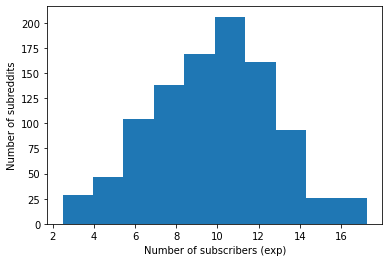

In [11]:
plt.hist([math.log(dict_list[k]['subscribers']+1) for k in range(len(dict_list)) if dict_list[k]['subscribers']])
plt.ylabel("Number of subreddits")
plt.xlabel("Number of subscribers (exp)")

In [12]:
dict_list[1]['description']

'For US news there is /r/news, for world news there is /r/worldnews, but what about deep and interesting feature articles? In-depth interviews? Other non-urgent or perhaps less-deep but still-powerful pieces?\n\nWelcome to /r/features, an evolving SubReddit for high-quality and evocative long-form content that does not fit neatly into any one category!\n\nThe Texts Continuum:\n\n* **/r/Vignettes** (short)\n* **\\/r/Features** (medium)\n* /r/LongText (long)\n* /r/TrueReddit (deep)\n* /r/DepthHub (meta)\n* /r/News (timely)\n* /r/WorldNews (global)\n* /r/Modded (moderated)\n\nIf you are looking for a place to suggest a feature for reddit, then /r/IdeasForTheAdmins is your subreddit of choice.\n\nNote: this SubReddit is a work in progress and we would welcome feedback from new readers and submitters alike as it grows!'

In [13]:
dict_list[1]['public_description']

'For US news there is /r/news, for world news there is /r/worldnews, but what about deep and interesting feature articles? Welcome to /r/features, an evolving SubReddit for high-quality and evocative long-form content that does not fit neatly into any one category!\n\nIf you are looking for a place to suggest a feature for reddit, then /r/IdeasForTheAdmins is your subreddit of choice.'

Interesting how `description` is not exactly the same as `public_description`. Should I use both? Perhaps just `description`, because people are more inclined to post on a subreddit if they are a member of that subreddit instead of just a random general public?

In [14]:
[dict_list[idx]['title'] for idx in range(len(dict_list))]

['Not Safe for Work',
 'features',
 'Request',
 'Citius, Altius, Fortius',
 'r/de - Extraordinär gut!',
 'Reddit en español para España',
 '/r/hanguk',
 'zh',
 'reddit日本語版',
 'hu',
 'European Union - EU - Europe',
 'Everything Italian',
 'ca',
 'Реддит: Стартовая страница Интернета',
 'programming',
 'Svenskt',
 'MoveOn actions that help reddit and progress',
 'Free Culture - Libre software, formats, and media',
 'arxiv',
 'The New York Times',
 '/r/SL &gt;&gt;&gt; /r/SecondLife',
 'Reddit Science',
 'For news about Barack Obama',
 '/r/netsec - Information Security News &amp; Discussion',
 'Politics',
 'bugs',
 'business',
 'gadgets',
 'Reddit Sports',
 'r/gaming',
 'entertainment',
 'cognitive science',
 'math',
 'Charlottesville High School',
 'Robotics',
 'Ron Paul - Campaign for Liberty',
 'Print Comics and Webcomics ',
 'Reddit Pics',
 'r/torrents - Torrenting Discussion and News',
 'bioinformatics',
 'Python',
 'xkcd',
 'lolcats',
 'Offbeat. (Funny/Weird/Sad News)',
 'Human Right

In [15]:
[dict_list[idx]['id'] for idx in range(len(dict_list))]

['vf2',
 '21n6',
 '21nj',
 '21of',
 '22i0',
 '22i2',
 '22i3',
 '22i5',
 '22i6',
 '2476',
 '247b',
 '247c',
 '247h',
 '247i',
 '2fwo',
 '3dzp',
 '3dzs',
 '49zi',
 '4od4',
 '9wby',
 'bi84',
 'mouw',
 '1a8ah',
 '1rqwi',
 '2cneq',
 '2h84o',
 '2qgzg',
 '2qgzt',
 '2qgzy',
 '2qh03',
 '2qh0f',
 '2qh0k',
 '2qh0n',
 '2qh0o',
 '2qh0p',
 '2qh0r',
 '2qh0s',
 '2qh0u',
 '2qh0w',
 '2qh0x',
 '2qh0y',
 '2qh0z',
 '2qh10',
 '2qh11',
 '2qh12',
 '2qh13',
 '2qh15',
 '2qh16',
 '2qh17',
 '2qh18',
 '2qh19',
 '2qh1a',
 '2qh1b',
 '2qh1d',
 '2qh1e',
 '2qh1f',
 '2qh1h',
 '2qh1i',
 '2qh1j',
 '2qh1k',
 '2qh1m',
 '2qh1n',
 '2qh1o',
 '2qh1p',
 '2qh1q',
 '2qh1r',
 '2qh1s',
 '2qh1t',
 '2qh1u',
 '2qh1w',
 '2qh21',
 '2qh22',
 '2qh23',
 '2qh24',
 '2qh26',
 '2qh27',
 '2qh28',
 '2qh29',
 '2qh2a',
 '2qh2b',
 '2qh2c',
 '2qh2d',
 '2qh2e',
 '2qh2f',
 '2qh2i',
 '2qh2j',
 '2qh2k',
 '2qh2l',
 '2qh2n',
 '2qh2p',
 '2qh2s',
 '2qh2t',
 '2qh2u',
 '2qh2v',
 '2qh2w',
 '2qh2x',
 '2qh2z',
 '2qh30',
 '2qh31',
 '2qh32',
 '2qh33',
 '2qh34',
 '2

It seems that I need subreddit id's afterall. Good thing I have this info. For each of the subreddits that we are interested in, let's get their id's and then descriptions.

<a id="sub4"></a>
## Reading in complete list of graph subreddits

In [16]:
subreddit_files = [
    "subreddit_ns_2021-01.json",
    "subreddit_ns_2021-02.json",
    "subreddit_ns_2021-03.json",
    "subreddit_ns_2021-04.json",
    "subreddit_ns_2021-05.json",
    "subreddit_ns_2021-06.json"
]

In [17]:
subreddits = set()

In [18]:
pd = os.path.split(os.getcwd())[0]
data_fp = os.path.join(pd,"data/newssources-subreddits")

In [19]:
for sf in subreddit_files:
    with open(os.path.join(data_fp,sf), "r", encoding="utf-8") as infile1:
        current = json.load(infile1)
        subreddits = subreddits | set(current.keys())
    print(len(subreddits))

34078
51869
68178
82165
96439
108575


In [20]:
len(subreddits)

108575

Let's get their id's!

In [21]:
with open("subreddit_id.json", "r", encoding="utf-8") as infile3:
    subreddit_id = json.load(infile3)

`subreddit_id` contains all subreddits with posts in the past 6 months. We only care about the subreddits with news source links, so I intersect `subreddit_id` and `subreddits`.

In [39]:
subreddit_intersect = set(subreddits) & set(subreddit_id.keys())

In [40]:
srID = {k:subreddit_id[k] for k in subreddit_intersect}

In [41]:
IDsr = {v:k for k,v in srID.items()}

`subreddit_id` contains the matching {`subreddit`: `it's id`}, and `IDsr` is its inverse.

Now let's create the matching {`subreddit`: `it's description`} and {`subreddit_id`: `it's description`}

In [42]:
ids = list(IDsr.keys())

In [43]:
len(ids)

108575

In [44]:
ids[1034:1041]

['49ghjx', '47gi0z', '3bpl8', '31qn9g', '2yp2h', '4c8vmw', '3x4qvt']

<a id="sub5"></a>
## Finding subreddit descriptions and subscribers

As of August 6, 2021

In [45]:
counter = 0

# for descriptions
desc_found = 0
subreddit_description = dict()
id_description = dict()

# for subscribers
subscribers_found = 0
subreddit_subscribers = dict()
id_subscribers = dict()

print("start time: {}".format(datetime.datetime.now()))

with open("D://Wellesley/F21/thesis_zst_data/reddit_subreddits.ndjson.zst", 'rb') as ifh: #, open("stream_output.json", 'wb') as ofh:
    with dctx.stream_reader(ifh, read_size=2) as reader:
        text_stream = io.TextIOWrapper(reader, encoding='utf-8')
        for line in text_stream:
            # if counter >= 10000:
            #     break
            if counter % 50000 == 0:
                print("counter: {} at {}".format(counter, datetime.datetime.now()))
            d = json.loads(line)
            srdtid = d["id"]
            if srdtid in ids:
                # descriptions
                subreddit_description[IDsr[srdtid]] = d["description"]
                id_description[srdtid] = d["description"]
                desc_found += 1
                # subscribers
                subreddit_subscribers[IDsr[srdtid]] = d["subscribers"]
                id_subscribers[srdtid] = d["subscribers"]
                subscribers_found += 1
            counter += 1
            # let's break if descriptions for all id's have been found
            if (desc_found == len(ids)) and (subscribers_found == len(ids)):
                print("all found after {} look ups. Done!".format(counter))
                break
            
print("finish time: {}".format(datetime.datetime.now()))

start time: 2022-02-21 11:15:20.170980
counter: 0 at 2022-02-21 11:15:20.178503
counter: 50000 at 2022-02-21 11:21:27.006762
counter: 100000 at 2022-02-21 11:28:11.406076
counter: 150000 at 2022-02-21 11:35:24.442539
counter: 200000 at 2022-02-21 11:42:59.458384
counter: 250000 at 2022-02-21 11:50:33.842050
counter: 300000 at 2022-02-21 11:58:32.118461
counter: 350000 at 2022-02-21 12:06:23.858332
counter: 400000 at 2022-02-21 12:14:21.924238
counter: 450000 at 2022-02-21 12:22:25.350001
counter: 500000 at 2022-02-21 12:31:12.143052
counter: 550000 at 2022-02-21 12:39:54.257214
counter: 600000 at 2022-02-21 12:47:53.554216
counter: 650000 at 2022-02-21 12:56:00.443222
counter: 700000 at 2022-02-21 13:04:09.283789
counter: 750000 at 2022-02-21 13:12:22.970813
counter: 800000 at 2022-02-21 13:20:26.522834
counter: 850000 at 2022-02-21 13:28:33.433358
counter: 900000 at 2022-02-21 13:36:38.726675
finish time: 2022-02-21 13:38:55.364351


In [46]:
counter

914066

In [47]:
print(f"{subscribers_found} found out of {len(ids)} ({subscribers_found*100/len(ids)}). Counter: {counter}.")

49055 found out of 108575 (45.180750633202855). Counter: 914066.


In [48]:
print(f"{desc_found} found out of {len(ids)} ({desc_found*100/len(ids)}). Counter: {counter}.")

49055 found out of 108575 (45.180750633202855). Counter: 914066.


It is interesting that PushShift's `subreddit` folder only contains 70% of the subreddits mentioned in their `submission` folder. `subreddit` has 914k subreddits.

Perhaps 30% has no descriptions?

In [56]:
# example description
subreddit_description["prisons"]

'Nothing can be more abhorrent to democracy than to imprison a person or keep him in prison because he is unpopular. This is really the test of civilization\n\nThe true test of society is how well it treats its prisoners and old people.\n\nThe test of a civilization is in the way it cares for its helpless members\n\nJoin the discussion of abuse in the "troubled teen" bootcamps at /r/troubledteens\n\nYou might also like:\n\n* /r/bad_cop_no_donut\n* /r/justiceporn\n* /r/good_cop_free_donut\n* /r/forfeiture\n* /r/prisonreform\n* /r/AmIFreeToGo\n* /r/ExCons\n* /r/abolish '

In [49]:
srID["prisons"]

'2sbiw'

In [50]:
id_description['2sbiw']

'Nothing can be more abhorrent to democracy than to imprison a person or keep him in prison because he is unpopular. This is really the test of civilization\n\nThe true test of society is how well it treats its prisoners and old people.\n\nThe test of a civilization is in the way it cares for its helpless members\n\nJoin the discussion of abuse in the "troubled teen" bootcamps at /r/troubledteens\n\nYou might also like:\n\n* /r/bad_cop_no_donut\n* /r/justiceporn\n* /r/good_cop_free_donut\n* /r/forfeiture\n* /r/prisonreform\n* /r/AmIFreeToGo\n* /r/ExCons\n* /r/abolish '

In [58]:
subreddit_description['HealthAI']

'Health AI: News, research and discussion related to AI technology used in healthcare. \n\nRelated subreddits:\n\nr/artificial/\n\nr/MachineLearning/\n\nr/healthIT/\n\nr/AITutorials/\n\nr/bigdata/\n\nr/bioinformatics/\n\nr/healthcare/\n\nr/publichealth/\n\nr/medicine/\n\nr/neuroscience/'

Let's save these into files

In [51]:
with open("subreddit_description.json", "w", encoding = "utf-8") as outfile_srd:
    json.dump(subreddit_description, outfile_srd)

In [52]:
with open("id_description.json", "w", encoding = "utf-8") as outfile_id:
    json.dump(id_description, outfile_id)

In [53]:
with open("subreddit_subscribers.json", "w", encoding = "utf-8") as outfile_subc:
    json.dump(subreddit_subscribers, outfile_subc)

In [54]:
len(id_subscribers)

49055

In [55]:
with open("id_subscribers.json", "w", encoding = "utf-8") as outfile_subc_id:
    json.dump(id_subscribers, outfile_subc_id)

In [61]:
subreddit_subscribers

{'nsfw': 1880887,
 'request': 1588,
 'olympics': 417898,
 'de': 275903,
 'es': 47086,
 'ja': 2971,
 'hu': 118,
 'eu': 3518,
 'it': 7183,
 'ca': 273,
 'programming': 2658512,
 'moveon': 69,
 'freeculture': 8484,
 'nytimes': 2468,
 'science': 24268001,
 'obama': 26579,
 'netsec': 373753,
 'politics': 6201779,
 'bugs': 28047,
 'business': 555530,
 'gadgets': 16890685,
 'sports': 17292578,
 'gaming': 26628444,
 'entertainment': 1591748,
 'cogsci': 95560,
 'math': 1188612,
 'robotics': 118551,
 'ronpaul': 23227,
 'comics': 1394257,
 'pics': 24911449,
 'torrents': 137204,
 'bioinformatics': 46928,
 'Python': 595969,
 'xkcd': 134964,
 'lolcats': 112010,
 'offbeat': 540006,
 'hrw': 1394,
 'worldnews': 24253881,
 'area51': 26499,
 'technology': 9065541,
 'geek': 585869,
 'hardware': 1208099,
 'software': 99119,
 'linux': 532170,
 'microsoft': 108992,
 'podcasts': 1313389,
 'videos': 23114010,
 'apple': 1521243,
 'blogs': 13695,
 'sandbox': 268,
 'productivity': 439476,
 'web_design': 467478,
 '

In [60]:
print(len([k for k in srID.keys() if k[:2]=="u_" ]))

39097


In [65]:
print([subreddit_subscribers[k] for k in subreddit_subscribers.keys() if k[:2]=="u_" ]) 

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 